In [58]:
#!pip install nasdaq-data-link
import nasdaqdatalink
nasdaqdatalink.ApiConfig.api_key = '5BwoEH6x8VTcx9HS8hca'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [59]:
AAPLtest = nasdaqdatalink.get_table('SHARADAR/SEP', ticker=['AAPL'])
AAPLtrain = pd.read_csv('WIKI-AAPL.csv')


In [60]:
def up_or_down(row):
    if row['Open'] < row['Close']:
        val = 1
    else:
        val = 0
    return val
def percentgain(row):
    val = ((row['open']-row['close'])/row['close'])*100
    return val
AAPLtrain['increased'] = AAPLtrain.apply(up_or_down, axis = 1)
# AAPL['percentgain'] = AAPL.apply(percentgain,axis =1)

In [61]:
# Drops unneccsary data from AAPL training set
AAPLtrain = AAPLtrain.drop('Ex-Dividend',axis = 1)
AAPLtrain = AAPLtrain.drop('Split Ratio',axis = 1)
AAPLtrain = AAPLtrain.drop('Adj. Open',axis = 1)
AAPLtrain = AAPLtrain.drop('Adj. High',axis = 1)
AAPLtrain = AAPLtrain.drop('Adj. Low',axis = 1)
AAPLtrain = AAPLtrain.drop('Adj. Close',axis = 1)
AAPLtrain = AAPLtrain.drop('Adj. Volume',axis = 1)

In [63]:
AAPLtest = AAPLtest.drop('closeadj',axis = 1)
AAPLtest = AAPLtest.drop('closeunadj',axis = 1)
AAPLtest = AAPLtest.drop('lastupdated',axis = 1)
AAPLtest = AAPLtest.drop('ticker',axis =1)

<Axes: >

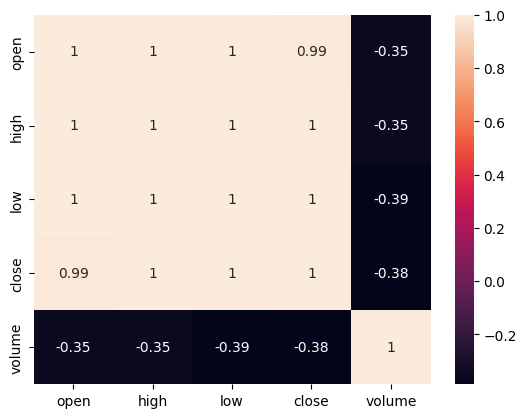

In [64]:
# AAPLCORR = AAPL.drop('ticker',axis =1)
AAPLCORR = AAPLtest.drop('date',axis = 1)
# AAPLCORR = AAPLCORR.drop('lastupdated',axis = 1)
sns.heatmap(AAPLCORR.corr(), annot = True)

In [50]:
X = AAPLCORR.drop('increased',axis = 1)
y = AAPLtrain['increased']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=32,stratify = y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.6042553191489362


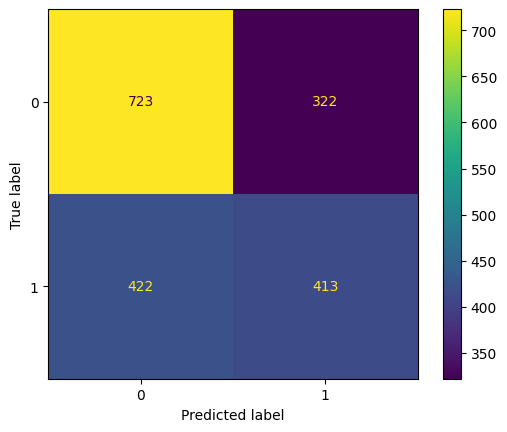

In [51]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

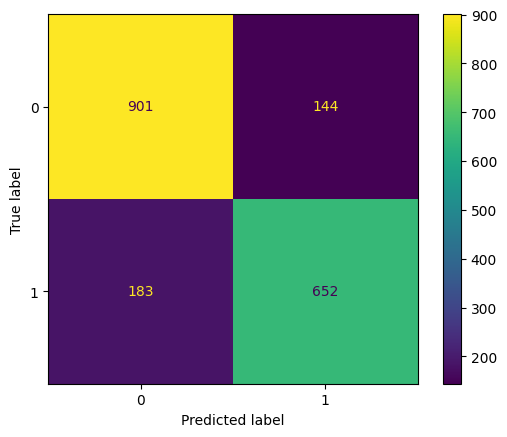

In [52]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

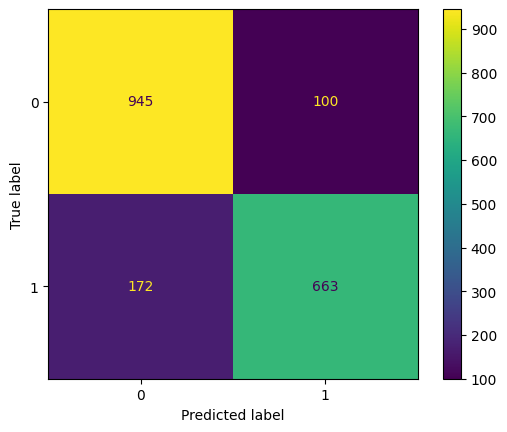

In [53]:
rf = RandomForestClassifier(n_estimators=100, random_state=32)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)